In [170]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from data.utils import get_datetime_dataframe
from datetime import datetime

In [203]:
# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

In [172]:
df = get_datetime_dataframe()
df.drop(df.columns[1], axis=1, inplace=True)
df.set_index('year week', inplace=True)
df.index = pd.DatetimeIndex(df.index, closed='left').to_period('W')
df

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,nhs swine,night nurse,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate
year week,,,,,,,,,,,,,,,,,,,,,
2004-01-05/2004-01-11,2004,1,115.857389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.994878,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,18.716703
2004-01-12/2004-01-18,2004,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,12.366981
2004-01-19/2004-01-25,2004,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,107.997079,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,8.808089
2004-01-26/2004-02-01,2004,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.092730,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.575904
2004-02-02/2004-02-08,2004,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.837619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26/2018-12-02,2018,47,357.530206,41.092217,27.220088,60.270243,48.803031,72.338072,21.485834,277.574666,...,0.000000,129.701997,96.073783,12.137666,0.0,0.0,5.941338,0.0,12.850613,6.175297
2018-12-03/2018-12-09,2018,48,343.500128,40.303629,25.485104,80.116784,70.849770,102.013875,21.244784,247.225283,...,0.000000,157.086094,49.510694,24.747760,0.0,0.0,28.375626,0.0,5.905376,7.382408
2018-12-10/2018-12-16,2018,49,263.128745,38.461304,27.229028,63.119445,43.211300,66.995693,18.879464,235.339674,...,11.882555,118.620181,85.829489,11.640776,0.0,0.0,21.390838,0.0,0.000000,8.012008


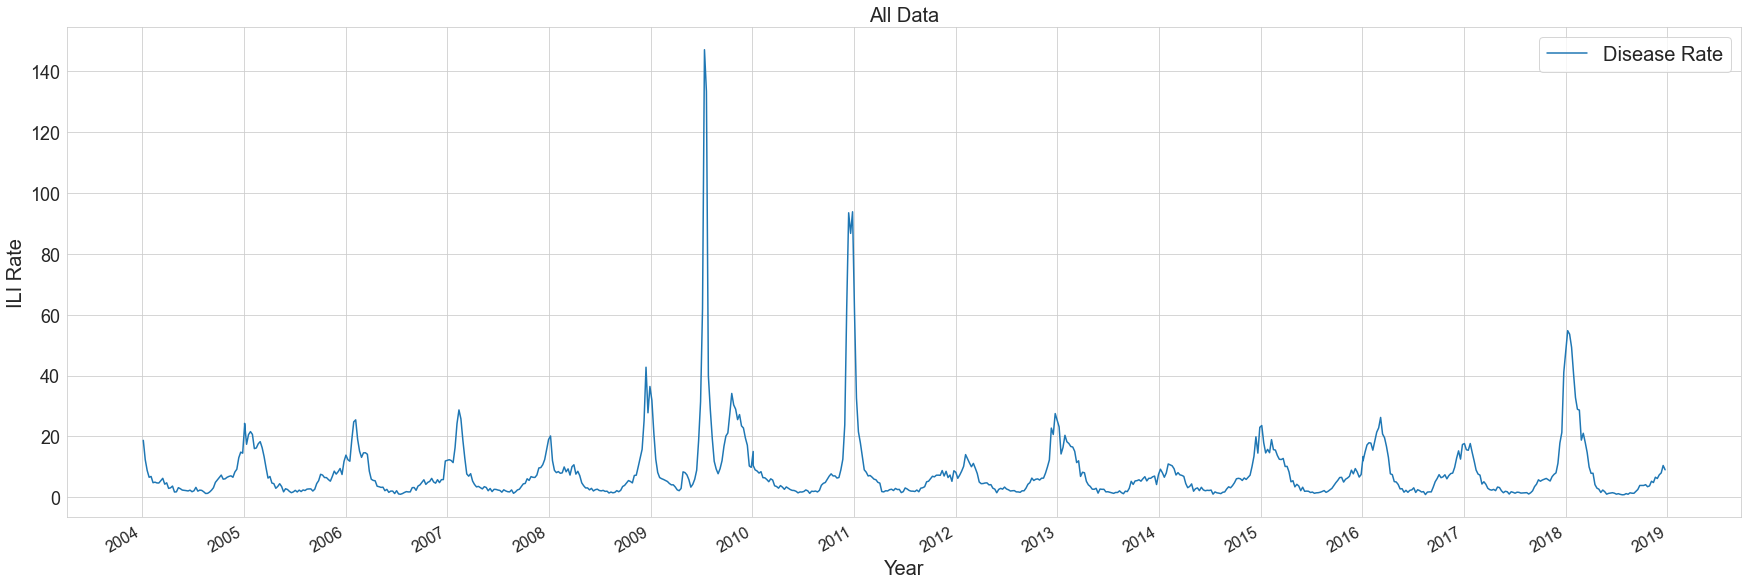

In [128]:
fig, ax = plt.subplots(figsize=(30, 10))

df.plot(use_index=True, y='Disease Rate', x_compat=True, ax=ax)

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('ILI Rate', fontsize = 20)

plt.legend(fontsize="20")
plt.title('All Data', fontsize=20)

plt.show()

In [173]:
def year_week_to_weekrange(year, week):
    return datetime.strptime(str(year) + " " + str(week) + " 1","%Y %U %w")

In [174]:
training_start_year = 2004
training_start_week = 1
training_end_year = 2011
training_end_week = 30

test_start_year = 2011
test_start_week = 31
test_end_year = 2015
test_end_week = 52

training_start =  year_week_to_weekrange(training_start_year, training_start_week)
training_end =  year_week_to_weekrange(training_end_year, training_end_week)

test_start = year_week_to_weekrange(test_start_year, test_start_week)
test_end = year_week_to_weekrange(test_end_year, test_end_week)

training_data = df['Disease Rate'][training_start:training_end]
test_data = df['Disease Rate'][test_start:test_end]
print('Training Data\n-------------\n' + str(training_data))
print('\n')
print('Test Data\n----------\n' + str(training_data))

Training Data
-------------
year week
2004-01-05/2004-01-11    18.716703
2004-01-12/2004-01-18    12.366981
2004-01-19/2004-01-25     8.808089
2004-01-26/2004-02-01     6.575904
2004-02-02/2004-02-08     6.837619
                           ...    
2011-06-27/2011-07-03     1.850233
2011-07-04/2011-07-10     3.063984
2011-07-11/2011-07-17     2.729239
2011-07-18/2011-07-24     2.253958
2011-07-25/2011-07-31     2.014715
Freq: W-SUN, Name: Disease Rate, Length: 396, dtype: float64


Test Data
----------
year week
2004-01-05/2004-01-11    18.716703
2004-01-12/2004-01-18    12.366981
2004-01-19/2004-01-25     8.808089
2004-01-26/2004-02-01     6.575904
2004-02-02/2004-02-08     6.837619
                           ...    
2011-06-27/2011-07-03     1.850233
2011-07-04/2011-07-10     3.063984
2011-07-11/2011-07-17     2.729239
2011-07-18/2011-07-24     2.253958
2011-07-25/2011-07-31     2.014715
Freq: W-SUN, Name: Disease Rate, Length: 396, dtype: float64


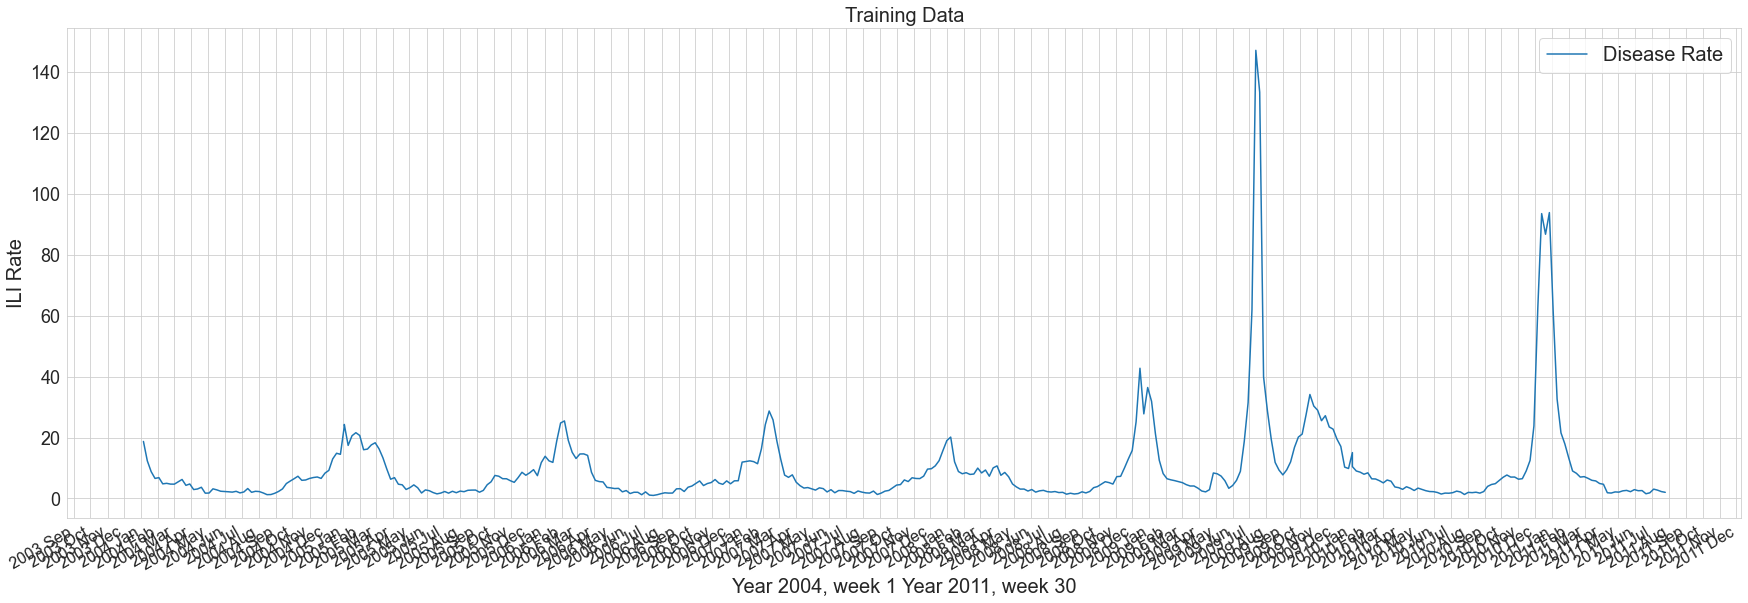

In [175]:
fig, ax = plt.subplots(figsize=(30, 10))

training_data.plot(use_index=True, y='Disease Rate', x_compat=True, ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))

plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

ax.set_xlabel('Year ' + str(training_start_year) + ', week ' + str(training_start_week) + 
              ' Year ' + str(training_end_year) + ', week ' + str(training_end_week), fontsize = 20)
ax.set_ylabel('ILI Rate', fontsize = 20)

plt.legend(fontsize="20")
plt.title('Training Data', fontsize=20)

plt.show()

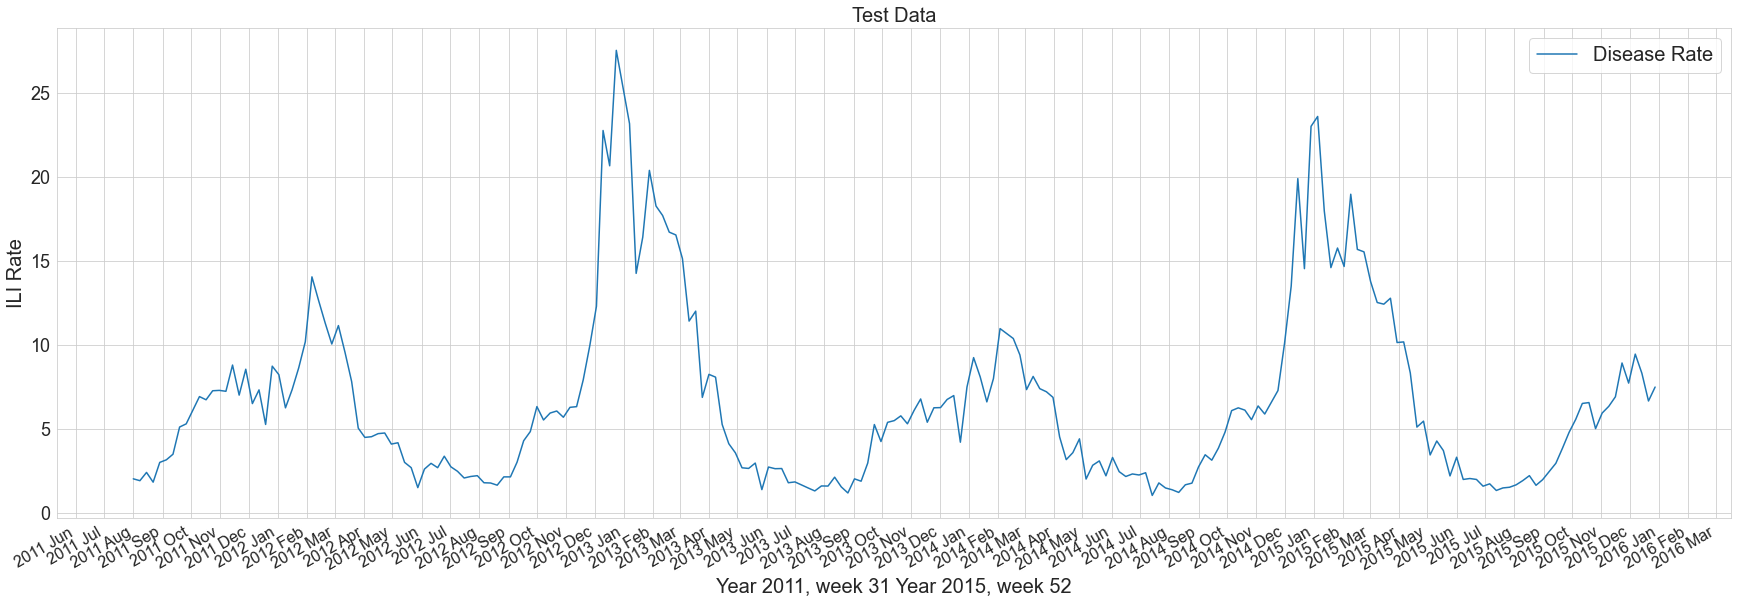

In [176]:
fig, ax = plt.subplots(figsize=(30, 10))

test_data.plot(use_index=True, y='Disease Rate', x_compat=True, ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))

plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

ax.set_xlabel('Year ' + str(test_start_year) + ', week ' + str(test_start_week) + 
              ' Year ' + str(test_end_year) + ', week ' + str(test_end_week), fontsize = 20)
ax.set_ylabel('ILI Rate', fontsize = 20)

plt.legend(fontsize="20")
plt.title('Test Data', fontsize=20)

plt.show()

In [197]:
ar_order = (20,0,0)
# ar = sm.tsa.statespace.SARIMAX(endog=training_data, order=ar_order, 
#                                enforce_stationarity=False, enforce_invertibility=False)

model = sm.tsa.statespace.SARIMAX(endog=training_data, order=ar_order)
# mode = sm.tsa.ar_model import AutoReg

In [190]:
fit_training = model.fit()
fit_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Disease Rate   No. Observations:                  396
Model:              SARIMAX(20, 0, 0)   Log Likelihood               -1318.139
Date:                Sat, 26 Feb 2022   AIC                           2678.278
Time:                        22:15:56   BIC                           2761.888
Sample:                    01-11-2004   HQIC                          2711.402
                         - 07-31-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3698      0.018     74.791      0.000       1.334       1.406
ar.L2         -0.8448      0.037    -22.998      0.000      -0.917      -0.773
ar.L3          0.6065      0.059     10.334      0.000       0.491       0.722
ar.L4         -0.4712      0.085     -5.576      0.000      -0.637      -0.306
ar.L5          0.3065      0.110      2.784      0.005       0.091       0.522
ar.L6         -0.1779      0.138     -1.286      0.198      -0.449       0.093
ar.L7          0.1124      0.208      0.541      0.588      -0.294       0.519
ar.L8         -0.0688      0.279     -0.247      0.805      -0.615       0.477
ar.L9          0.0738      0.344      0.214      0.830      -0.601       0.749
ar.L10        -0.0350      0.323     -0.108      0.914      -0.669       0.599
ar.L11         0.0518      0.247      0.210      0.834      -0.431       0.535
ar.L12        -0.0698      0.288     -0.242      0.809      -0.634       0.494
ar.L13         0.0809      0.316      0.256      0.798      -0.539       0.701
ar.L14        -0.0318      0.322     -0.099      0.921      -0.663       0.599
ar.L15         0.0139      0.306      0.045      0.964      -0.586       0.614
ar.L16        -0.0134      0.288     -0.047      0.963      -0.578       0.551
ar.L17         0.0160      0.218      0.073      0.942      -0.412       0.444
ar.L18        -0.0050      0.209     -0.024      0.981      -0.414       0.405
ar.L19         0.0125      0.185      0.068      0.946      -0.350       0.375
ar.L20        -0.0037      0.122     -0.030      0.976      -0.242       0.235
sigma2        45.2919      1.178     38.435      0.000      42.982      47.602
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             59066.85
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              22.49   Skew:                             3.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

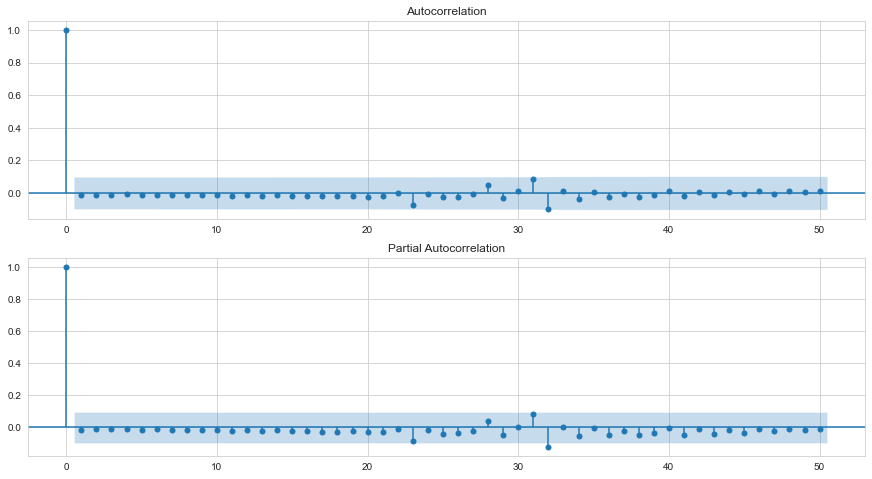

In [191]:
residuals = fit_training.resid

fig, ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(residuals, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuals, lags=50, ax=ax[1])

plt.show()

In [192]:
# Fit plot of training dataset
y_training_pred = fit_training.predict(training_start, training_end, dynamic=False)

full_training_df = df[df.columns][training_start:training_end]
full_training_df['Predicted Rate'] = y_training_pred
full_training_df

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,night nurse,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,Predicted Rate
year week,,,,,,,,,,,,,,,,,,,,,
2004-01-05/2004-01-11,2004,1,115.857389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.994878,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,18.716703,0.000000
2004-01-12/2004-01-18,2004,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,12.366981,16.760381
2004-01-19/2004-01-25,2004,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,107.997079,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,8.808089,8.258381
2004-01-26/2004-02-01,2004,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.092730,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,6.575904,7.748704
2004-02-02/2004-02-08,2004,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,6.837619,4.662634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-06-27/2011-07-03,2011,26,23.103752,6.479004,14.743260,63.767112,6.101516,5.865335,8.264255,26.108959,...,114.292669,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.850233,0.676962
2011-07-04/2011-07-10,2011,27,37.571465,6.002352,8.809539,48.606088,0.000000,0.000000,14.841106,27.472189,...,0.000000,0.0,23.849476,0.0,0.0,0.000000,0.0,0.0,3.063984,2.607800
2011-07-11/2011-07-17,2011,28,25.222502,0.000000,0.000000,31.582845,0.000000,6.165739,0.000000,18.398269,...,21.525764,0.0,21.438937,0.0,0.0,0.000000,0.0,0.0,2.729239,2.901198


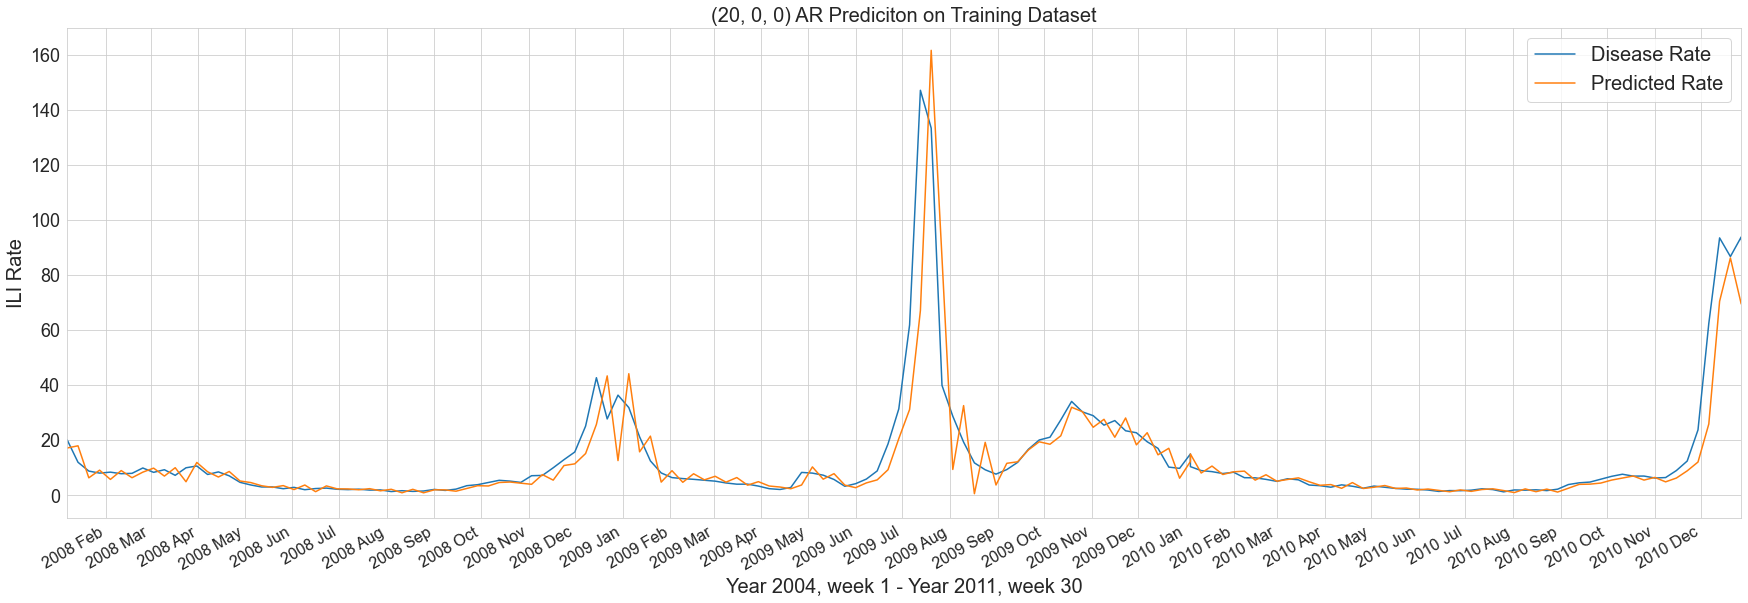

In [193]:
fig, ax = plt.subplots(figsize=(30, 10))

full_training_df.plot(use_index=True, y='Disease Rate', x_compat=True, ax=ax)
full_training_df.plot(use_index=True, y='Predicted Rate', x_compat=True, ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))

plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

ax.set_xlabel('Year ' + str(training_start_year) + ', week ' + str(training_start_week) + 
              ' - Year ' + str(training_end_year) + ', week ' + str(training_end_week), fontsize = 20)
ax.set_ylabel('ILI Rate', fontsize = 20)

plt.legend(fontsize="20")
plt.title(str(ar_order) + ' AR Prediciton on Training Dataset', fontsize=20)

plt.xlim(year_week_to_weekrange(2008, 1), year_week_to_weekrange(2010, 52)) # show only part of training fit

plt.show()

In [198]:
model = sm.tsa.statespace.SARIMAX(endog=test_data, order=ar_order)
fit_test = model.fit()

fit_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Disease Rate   No. Observations:                  230
Model:              SARIMAX(20, 0, 0)   Log Likelihood                -465.813
Date:                Sat, 26 Feb 2022   AIC                            973.626
Time:                        22:34:58   BIC                           1045.826
Sample:                    08-07-2011   HQIC                          1002.750
                         - 01-03-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8933      0.047     18.940      0.000       0.801       0.986
ar.L2          0.1298      0.047      2.736      0.006       0.037       0.223
ar.L3          0.0266      0.070      0.378      0.706      -0.111       0.165
ar.L4         -0.1103      0.056     -1.980      0.048      -0.220      -0.001
ar.L5          0.0619      0.097      0.640      0.522      -0.128       0.252
ar.L6          0.0752      0.103      0.727      0.467      -0.127       0.278
ar.L7         -0.1611      0.126     -1.279      0.201      -0.408       0.086
ar.L8          0.1388      0.115      1.202      0.229      -0.087       0.365
ar.L9         -0.0818      0.136     -0.603      0.547      -0.348       0.184
ar.L10         0.1069      0.134      0.800      0.423      -0.155       0.369
ar.L11        -0.1124      0.138     -0.813      0.416      -0.383       0.159
ar.L12        -0.0347      0.142     -0.244      0.807      -0.314       0.244
ar.L13         0.0714      0.138      0.518      0.604      -0.198       0.341
ar.L14        -0.0442      0.160     -0.276      0.782      -0.358       0.269
ar.L15        -0.0184      0.168     -0.110      0.913      -0.347       0.310
ar.L16        -0.0159      0.189     -0.084      0.933      -0.387       0.355
ar.L17         0.0199      0.165      0.121      0.904      -0.303       0.343
ar.L18        -0.0512      0.175     -0.293      0.770      -0.394       0.292
ar.L19         0.0780      0.190      0.411      0.681      -0.294       0.450
ar.L20        -0.0041      0.137     -0.030      0.976      -0.273       0.265
sigma2         3.3122      0.179     18.520      0.000       2.962       3.663
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               742.29
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.84
Prob(H) (two-sided):                  0.19   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
test_result = model.filter(fit_training.params) # use params previously learned from training data
y_test_pred = test_result.predict(dynamic=False)

y_test_pred

year week
2011-08-01/2011-08-07     0.000000
2011-08-08/2011-08-14     1.798181
2011-08-15/2011-08-21     1.585084
2011-08-22/2011-08-28     2.353236
2011-08-29/2011-09-04     1.155086
                           ...    
2015-11-30/2015-12-06     8.476238
2015-12-07/2015-12-13     5.851051
2015-12-14/2015-12-20    10.027215
2015-12-21/2015-12-27     5.645514
2015-12-28/2016-01-03     6.391405
Freq: W-SUN, Name: predicted_mean, Length: 230, dtype: float64

In [205]:
full_test_df = df[df.columns][test_start:test_end]
full_test_df['Predicted Rate'] = y_test_pred
full_test_df

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,night nurse,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,Predicted Rate
year week,,,,,,,,,,,,,,,,,,,,,
2011-08-01/2011-08-07,2011,31,27.759712,0.000000,0.000000,34.050260,0.000000,12.128912,11.256437,35.144124,...,19.715545,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.008070,0.000000
2011-08-08/2011-08-14,2011,32,11.940390,6.218850,0.000000,25.419388,0.000000,5.700187,11.876929,42.461498,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.897285,1.798181
2011-08-15/2011-08-21,2011,33,30.308972,0.000000,0.000000,51.420885,0.000000,8.399149,14.338609,31.487596,...,49.960472,20.522112,22.553721,0.0,0.000000,20.154960,0.000000,0.000000,2.388736,1.585084
2011-08-22/2011-08-28,2011,34,64.048349,0.000000,0.000000,45.561083,0.000000,0.000000,5.858564,29.841474,...,63.340391,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.809246,2.353236
2011-08-29/2011-09-04,2011,35,39.412076,0.000000,6.402005,44.656120,6.082734,0.000000,5.922401,49.218378,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.986320,1.155086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30/2015-12-06,2015,48,95.877737,9.130693,16.992200,62.481234,14.356826,17.234640,17.048121,112.185299,...,62.110361,60.255322,25.929750,0.0,0.000000,10.845270,0.000000,0.000000,7.706909,8.476238
2015-12-07/2015-12-13,2015,49,81.042264,15.832014,16.900654,73.208197,3.433392,3.266695,17.472660,85.388707,...,77.270849,46.183563,22.508612,0.0,0.000000,11.951313,0.000000,0.000000,9.431818,5.851051
2015-12-14/2015-12-20,2015,50,71.954401,2.749521,14.166015,58.822850,0.000000,2.802483,8.629895,91.161269,...,81.172164,42.276630,36.730526,0.0,0.000000,29.734936,0.000000,0.000000,8.292423,10.027215


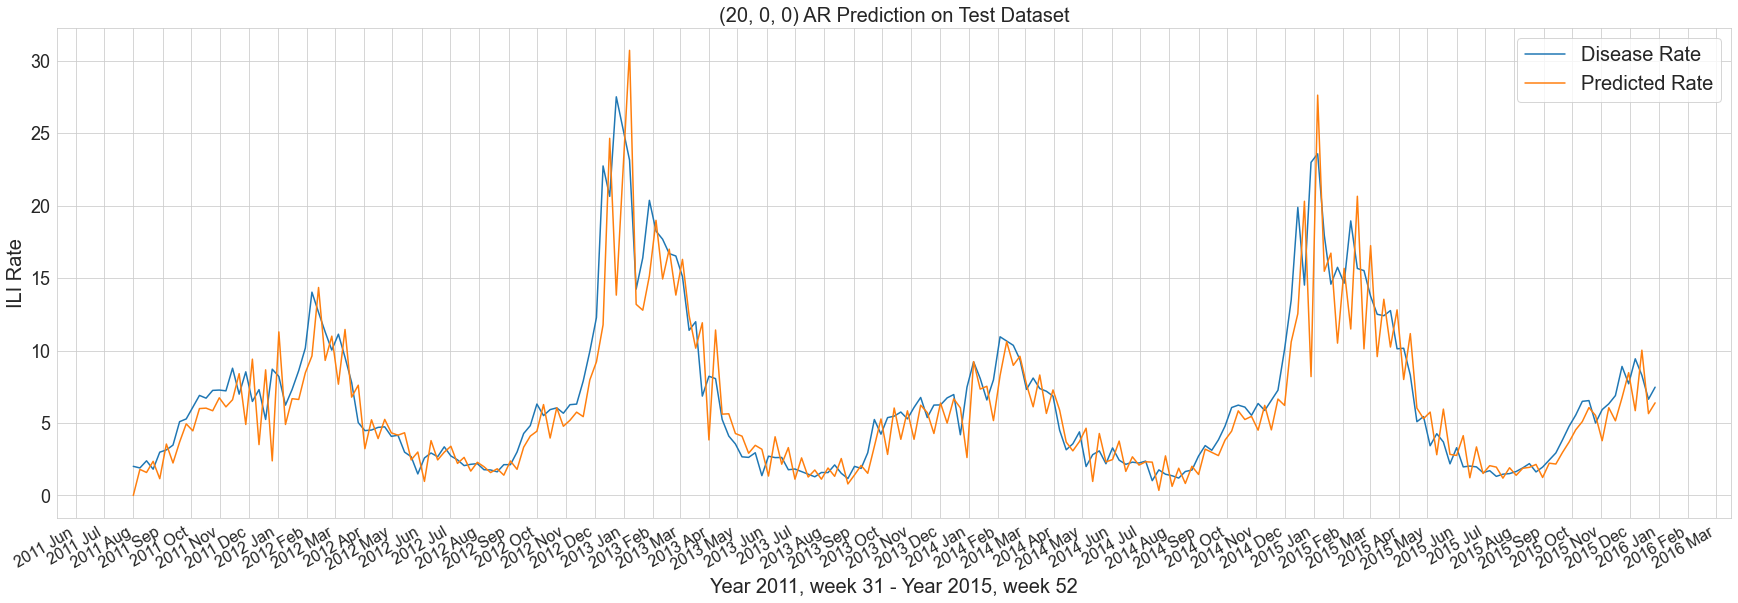

In [206]:
fig, ax = plt.subplots(figsize=(30, 10))

full_test_df.plot(use_index=True, y='Disease Rate', x_compat=True, ax=ax)
full_test_df.plot(use_index=True, y='Predicted Rate', x_compat=True, ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))

plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

ax.set_xlabel('Year ' + str(test_start_year) + ', week ' + str(test_start_week) + 
              ' - Year ' + str(test_end_year) + ', week ' + str(test_end_week), fontsize = 20)
ax.set_ylabel('ILI Rate', fontsize = 20)

plt.legend(fontsize="20")
plt.title(str(ar_order) + ' AR Prediction on Test Dataset', fontsize=20)

# plt.xlim(year_week_to_weekrange(2011, 30), year_week_to_weekrange(2012, 52))

plt.show()